## Problem Statement 1:
Is gender independent of education level? A random sample of 395 people were surveyed and each person was asked to report the highest education level they obtained. The data that resulted from the survey is summarized in the following table:  
Question: Are gender and education level dependent at **5%** level of significance?   
In other words, given the data collected above, is there a relationship between the gender of an individual and the level of education that they have obtained?

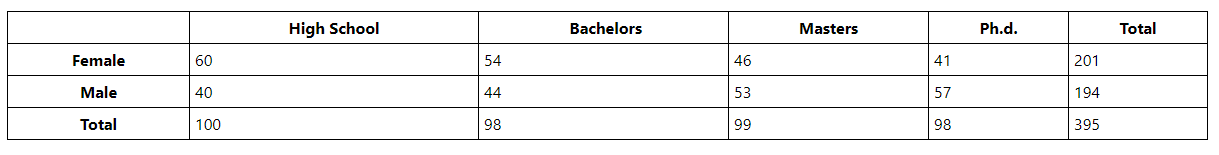

**`Null Hypotheses` H0 : Gender is Independent**  
**`Alternate Hypotheses` H1 : Gender is Dependent**

In [20]:
import numpy as np
from scipy import stats
expected_f_HS = round((100*201)/395,3)
expected_f_B  = round((98*201)/395,3)
expected_f_M  = round((99*201)/395,3)
expected_f_PhD= round((98*201)/395,3)
expected_m_HS = round((100*194)/395,3)
expected_m_B  = round((98*194)/395,3)
expected_m_M  = round((99*194)/395,3)
expected_m_PhD= round((98*194)/395,3)
sum = 0
chi_sq = np.power(60-expected_f_HS,2)/expected_f_HS + np.power(54-expected_f_B,2)/expected_f_B + (46-expected_f_M)**2/expected_f_M + (60-expected_f_PhD)**2/expected_f_PhD + (40-expected_m_HS)**2/expected_m_HS + (44-expected_m_B)**2/expected_m_B + (53-expected_m_M)**2/expected_m_M + (57-expected_m_PhD)**2/expected_m_PhD
print("Chi Square: ",chi_sq)

Chi Square:  8.487498522408528


In [21]:
def chi_critical(alpha,df):
    chi_sq_crtical_value = stats.chi2.ppf(1- alpha,df)
    return chi_sq_crtical_value

In [24]:
## df = (rows-1)*(columns-1) -->here rows = 2, cols = 4
df = 3
alpha = 0.05
chi_cric = chi_critical(alpha,df)
print("Chi Critical Value: ",round(chi_cric,2))

Chi Critical Value:  7.81


In [25]:
if chi_sq > chi_cric:
    print("Null Hypothese is Rejected")
else:
    print("Null Hypotheses is Accepted")

Null Hypothese is Rejected


**It infers that education level depends on gender at a 5% level of significance**

## Problem Statement 2:
Using the following data, perform a oneway analysis of variance using α=.05.  
Write up the results in APA format.  
[Group1: 51, 45, 33, 45, 67]  
[Group2: 23, 43, 23, 43, 45]  
[Group3: 56, 76, 74, 87, 56]  

In [41]:
#N is total number of data points across all groups
#n is total number of data points within a individual group
#a is total number of levels of factor


N = 15
n = 5
a = 3
alpha=.05
df_between = a-1 
print("DF Between: ",df_between)
df_within = N-a
print("DF Within: ",df_within)
df_total = N-1
print("DF Total: ",df_total)

DF Between:  2
DF Within:  12
DF Total:  14


In [36]:
group1 = np.array([51, 45, 33, 45, 67])
group2 = np.array([23, 43, 23, 43, 45])
group3 = np.array([56, 76, 74, 87, 56])

#print(group1,group2,group3)
print('-----Group 1 stats-------')
grp1_mean = np.mean(group1)
grp1_var = np.var(group1,ddof=1)
grp1_std_dev = round(np.sqrt(grp1_var),2)
print("Mean: ",grp1_mean)
print("Variance: ",grp1_var)
print("Std Deviation: ",grp1_std_dev) ##Sample Std Deviation
print('-----Group 2 stats-------')
grp2_mean = np.mean(group2)
grp2_var = np.var(group2,ddof=1)
grp2_std_dev = round(np.sqrt(grp2_var),2)
print("Mean: ",grp2_mean)
print("Variance: ",grp2_var)
print("Std Deviation: ",grp2_std_dev)
print('-----Group 3 stats-------')
grp3_mean = np.mean(group3)
grp3_var = np.var(group3,ddof=1)
grp3_std_dev = round(np.sqrt(grp3_var),2)
print("Mean: ",grp3_mean)
print("Variance: ",grp3_var)
print("Std Deviation: ",grp3_std_dev)

-----Group 1 stats-------
Mean:  48.2
Variance:  153.2
Std Deviation:  12.38
-----Group 2 stats-------
Mean:  35.4
Variance:  128.8
Std Deviation:  11.35
-----Group 3 stats-------
Mean:  69.8
Variance:  183.2
Std Deviation:  13.54


In [54]:
mean_sq_within = round(np.divide(grp1_var + grp2_var + grp3_var,3),2)
print("Mean Squares Within: ",mean_sq_within)
print('-------------------')
sum_of_sq_within = mean_sq_within * df_within
print("Sum of Squares Within: ",sum_of_sq_within)
print('-------------------')
mean_of_group_means = round(np.divide(grp1_mean+grp2_mean+grp3_mean,3),2)
print("Mean of Group Means: ",mean_of_group_means)
print('-------------------')
                                  

Mean Squares Within:  155.07
-------------------
Sum of Squares Within:  1860.84
-------------------
Mean of Group Means:  51.13
-------------------


In [59]:
varianceof_grp_means=np.divide((np.power(grp1_mean-mean_of_group_means,2) + np.power(grp2_mean-mean_of_group_means,2) + np.power(grp3_mean-mean_of_group_means,2)),2)
print("Variance of Group Means: ",varianceof_grp_means) 
mean_sq_between = round(varianceof_grp_means * 5,2) ## 5 is the no of elements in each grp
print("Mean Squares Between: ",mean_sq_between)
print('-------------------')
F_SCore = round(mean_sq_between / mean_sq_within,2)
print("F_Score: ",F_SCore)

Variance of Group Means:  302.29335
Mean Squares Between:  1511.47
-------------------
F_Score:  9.75


In [70]:
alpha = 0.05 
F_Critical = stats.f.ppf(1-alpha, df_between, df_within)
print("F_Critical: ",round(F_Critical,2))

if F_SCore > F_Critical:
    print("Null Hypothese is Rejected")
else:
    print("Null Hypotheses is Accepted")

F_Critical:  3.89
Null Hypothese is Rejected


## Problem Statement 3:
Calculate F Test for given 10, 20, 30, 40, 50 and 5,10,15, 20, 25.

In [81]:
#N is total number of data points across all groups
#n is total number of data points within a individual group
#a is total number of levels of factor


N = 10
n = 5
a = 2
alpha=.05
df_between = a-1 
print("DF Between: ",df_between)
df_within = N-a
print("DF Within: ",df_within)
df_total = N-1
print("DF Total: ",df_total)

DF Between:  1
DF Within:  8
DF Total:  9


In [82]:
group1 = np.array([10, 20, 30, 40, 50])
group2 = np.array([5,10,15, 20, 25])


#print(group1,group2,group3)
print('-----Group 1 stats-------')
grp1_mean = np.mean(group1)
grp1_var = np.var(group1,ddof=1)
grp1_std_dev = round(np.sqrt(grp1_var),2)
print("Mean: ",grp1_mean)
print("Variance: ",grp1_var)
print("Std Deviation: ",grp1_std_dev) ##Sample Std Deviation
print('-----Group 2 stats-------')
grp2_mean = np.mean(group2)
grp2_var = np.var(group2,ddof=1)
grp2_std_dev = round(np.sqrt(grp2_var),2)
print("Mean: ",grp2_mean)
print("Variance: ",grp2_var)
print("Std Deviation: ",grp2_std_dev)


-----Group 1 stats-------
Mean:  30.0
Variance:  250.0
Std Deviation:  15.81
-----Group 2 stats-------
Mean:  15.0
Variance:  62.5
Std Deviation:  7.91


In [84]:
mean_sq_within = round(np.divide(grp1_var + grp2_var,2))
print("Mean Squares Within: ",mean_sq_within)
print('-------------------')
sum_of_sq_within = mean_sq_within * df_within
print("Sum of Squares Within: ",sum_of_sq_within)
print('-------------------')
mean_of_group_means = round(np.divide(grp1_mean+grp2_mean,2),2)
print("Mean of Group Means: ",mean_of_group_means)
print('-------------------')

Mean Squares Within:  156
-------------------
Sum of Squares Within:  1248
-------------------
Mean of Group Means:  22.5
-------------------


In [86]:
varianceof_grp_means=np.divide((np.power(grp1_mean-mean_of_group_means,2) + np.power(grp2_mean-mean_of_group_means,2)),2)
print("Variance of Group Means: ",varianceof_grp_means) 
mean_sq_between = round(varianceof_grp_means * 5,2) ## 5 is the no of elements in each grp
print("Mean Squares Between: ",mean_sq_between)
print('-------------------')
F_SCore = round(grp1_var / grp2_var)
print("F_Score: ",F_SCore)

Variance of Group Means:  56.25
Mean Squares Between:  281.25
-------------------
F_Score:  4
